In [601]:
# importing libraries from packages
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
# specifying file name
file = "GOT_character_predictions.xlsx"

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python using read_excel function
df = pd.read_excel ("/Users/venugopalmuraleedharan/Downloads/GOT_character_predictions.xlsx")

# outputting the first five rows of the dataset using head()
df.tail(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1
1945,1946,Tytos Lannister,Casterly Rock,NaN,220.0,NaN,NaN,NaN,House Lannister,Jeyne Marbrand,0,0,1,1,1,NaN,NaN,NaN,1.0,1,1,47.0,4,0.210702,0


In [602]:
#Filling the column title with unknown
df['title']         = df['title'].fillna('unknown')
#Filling the column culture with unknown
df['culture']       = df['culture'].fillna('unknown')
#Filling the column mother with unknown
df['mother']        = df['mother'].fillna('unknown')
#Filling the column father with unknown
df['father']        = df['father'].fillna('unknown')
#Filling the column heir with unknown
df['heir']          = df['heir'].fillna('unknown')
#Filling the column house with unknown
df['house']         = df['house'].fillna('unknown')
#Filling the column spouse with unknown
df['spouse']        = df['spouse'].fillna('unknown')


In [603]:
#printing the first five rows using head()
df.head(5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,unknown,unknown,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,unknown,NaN,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [604]:
#Filling the column the age with median by using fillna()
df["age"].fillna(df["age"].median(), inplace=True)
#filling the null values in column isAliveMother with 1
df.isAliveMother.fillna(value=1,inplace=True)
#filling the null values in column isAliveFather with 0
df.isAliveFather.fillna(value=0,inplace=True)
#filling the null values in column isAliveSpouse with 0
df.isAliveSpouse.fillna(value=0,inplace=True)
#filling the null values in column isAliveHeir with 1
df.isAliveHeir.fillna(value=1,inplace=True)
#filling the null values in column dateOfBirth with -1
df.dateOfBirth.fillna(value=-1,inplace=True)

In [605]:
#Extracting first name for gender guesser and creating a new column in dataframe
df['first_name']= (df['name'].str.split(' ').str[0])
#Printing the the dataframe first five rows using head()
df.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name
0,1,Viserys II Targaryen,unknown,unknown,-1.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,Walder
2,3,Addison Hill,Ser,unknown,-1.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,1.0,0.0,1.0,0.0,0,1,27.0,0,0.267559,1,Addison
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,Sylva


In [606]:
#Checking the null values in dataframe using isnull() and aggregating the sum()
df.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
first_name                    0
dtype: int64

In [607]:
#Splitting the name based on paranthesis and saving it in new dataframe coulmn named parantheses
df['paranthese'] = df['name'].str.split('(').str[1]
#Replacing the ')' from name that is stored names
df['paranthese'] = df['paranthese'].str.replace(")", "" ) 

#Dropping S.No. column from dataframe
df.drop('S.No', inplace = True, axis = 1)

/var/folders/9n/b8tw7hpj0270v_7f6ltyrc6m0000gn/T/ipykernel_78066/2098945102.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paranthese'] = df['paranthese'].str.replace(")", "" )


#The below code is commented because the gender_guesser algorithm takes time to work and the output of gender guesser algorithm is not using anywhere in the code

In [608]:
# import random as rand
# import gender_guesser.detector as gender

# #list
# pl=[]
# for name in df['name']:
#     guess = gender.Detector().get_gender(name)
#     print(guess)
#     pl.append(guess)
    
# df['gender_guesser'] = pd.Series(pl)
# df.loc[: ,['name','gender_guesser']]

In [609]:
#Repalacing mostly_male with males and mostly_female into female and saving it in gender_guesser column
# df["gender_guesser"].replace({'mostly_male': 'male','mostly_female' :'female'},inplace =True)

In [610]:
#Printing the the dataframe first five rows using head()
df.head()

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name,paranthese
0,Viserys II Targaryen,unknown,unknown,-1.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,Viserys,NaN
1,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,Walder,NaN
2,Addison Hill,Ser,unknown,-1.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,1.0,0.0,1.0,0.0,0,1,27.0,0,0.267559,1,Addison,NaN
3,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,Aemma,NaN
4,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,Sylva,NaN


In [611]:
#Counting the values in gender_guesser column using value_counts function
# df['gender_guesser'].value_counts(normalize = True,
#                                  sort      = True,
#                                  ascending = False).round(2)

In [612]:
#Printing the values of gender_guesser column
# i=0
# gender_store = df['gender_guesser']
# while i < len(gender_store):
#     a=gender_store[i]
#     i = i + 1
#     print(a)

In [613]:
#Backing up the copy of dataframe to a new dataframe df_new
df_new= df


In [614]:
#Printing the dataframe informations using info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1946 non-null   object 
 1   title                       1946 non-null   object 
 2   culture                     1946 non-null   object 
 3   dateOfBirth                 1946 non-null   float64
 4   mother                      1946 non-null   object 
 5   father                      1946 non-null   object 
 6   heir                        1946 non-null   object 
 7   house                       1946 non-null   object 
 8   spouse                      1946 non-null   object 
 9   book1_A_Game_Of_Thrones     1946 non-null   int64  
 10  book2_A_Clash_Of_Kings      1946 non-null   int64  
 11  book3_A_Storm_Of_Swords     1946 non-null   int64  
 12  book4_A_Feast_For_Crows     1946 non-null   int64  
 13  book5_A_Dance_with_Dragons  1946 

In [615]:
#Dropping the paranthese coulmn which is not required
df.drop('paranthese', axis=1, inplace=True)

In [616]:
#Printing the dataframe informations using info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1946 non-null   object 
 1   title                       1946 non-null   object 
 2   culture                     1946 non-null   object 
 3   dateOfBirth                 1946 non-null   float64
 4   mother                      1946 non-null   object 
 5   father                      1946 non-null   object 
 6   heir                        1946 non-null   object 
 7   house                       1946 non-null   object 
 8   spouse                      1946 non-null   object 
 9   book1_A_Game_Of_Thrones     1946 non-null   int64  
 10  book2_A_Clash_Of_Kings      1946 non-null   int64  
 11  book3_A_Storm_Of_Swords     1946 non-null   int64  
 12  book4_A_Feast_For_Crows     1946 non-null   int64  
 13  book5_A_Dance_with_Dragons  1946 

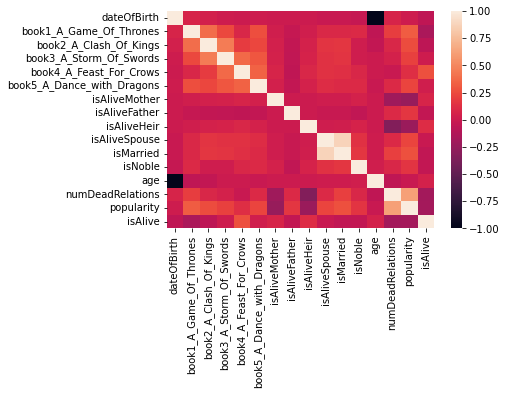

In [617]:
# declaring df_corr for saving the linear (Pearson) correlation
df_corr = df.corr(method = 'pearson').round(decimals = 2)

# instantiating a heatmap
sns.heatmap(df_corr)


# displaying the graph using plot.show()
plt.show()

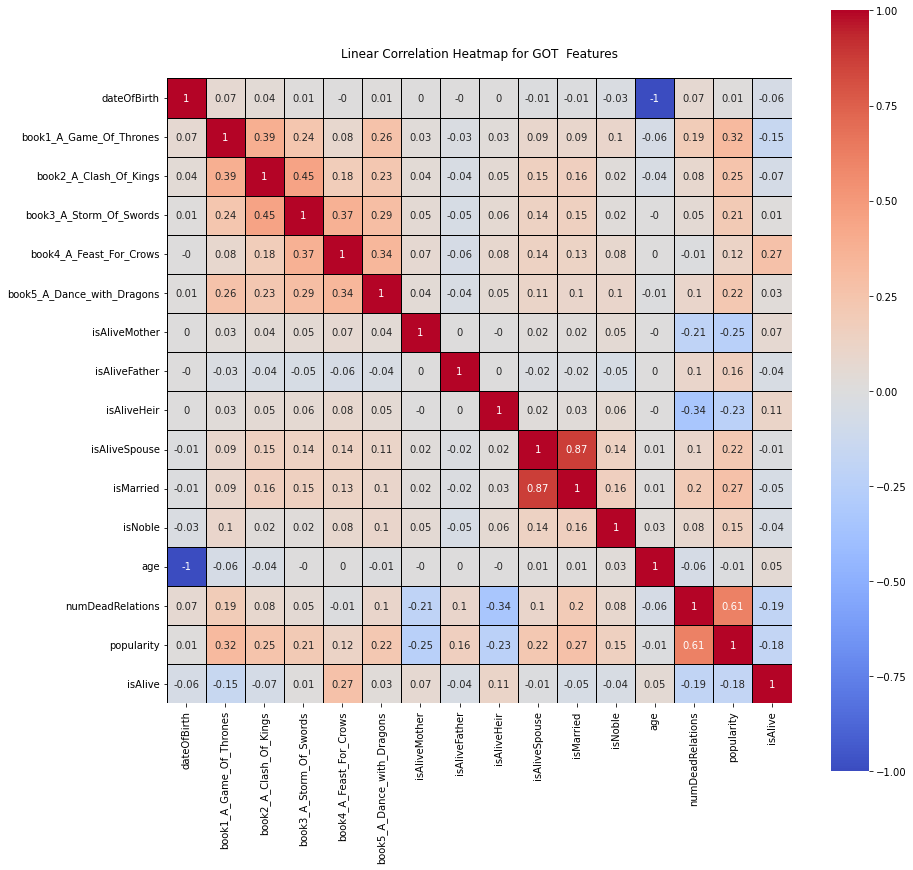

In [618]:
# specifying plot size (making it bigger) for visulalization
fig, ax = plt.subplots(figsize=(14,14))


# developing a coolwarm heatmap for the above correlation
sns.heatmap(data       = df_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for GOT  Features
""")
#Displaying the graph uisng plt.show()
plt.show()

In [619]:
#Describing the dataframe  having data type of numbers
df.describe(include = 'number').round(decimals = 1)

,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0
mean,350.2,0.2,0.4,0.5,0.6,0.4,1.0,0.0,1.0,0.1,0.1,0.5,-266.8,0.3,0.1,0.7
std,9244.2,0.4,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.3,0.3,0.5,9236.7,1.4,0.2,0.4
min,-28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-298001.0,0.0,0.0,0.0
25%,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0
50%,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0,1.0
75%,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.1,1.0
max,298299.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,15.0,1.0,1.0


In [620]:
#Describing the dataframe  having data type of objects
df.describe(include = 'object')

,name,title,culture,mother,father,heir,house,spouse,first_name
count,1946,1946,1946,1946,1946,1946,1946,1946,1946
unique,1946,263,65,18,21,23,348,255,1442
top,Viserys II Targaryen,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Jon
freq,1,1008,1269,1925,1920,1923,427,1670,21


In [621]:
# declaring df_corr for saving the linear (Pearson) correlation
df.corr(method = 'pearson').round(decimals = 2)

,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
dateOfBirth,1.00,0.07,0.04,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.03,-1.00,0.07,0.01,-0.06
book1_A_Game_Of_Thrones,0.07,1.00,0.39,0.24,0.08,0.26,0.03,-0.03,0.03,0.09,0.09,0.10,-0.06,0.19,0.32,-0.15
book2_A_Clash_Of_Kings,0.04,0.39,1.00,0.45,0.18,0.23,0.04,-0.04,0.05,0.15,0.16,0.02,-0.04,0.08,0.25,-0.07
book3_A_Storm_Of_Swords,0.01,0.24,0.45,1.00,0.37,0.29,0.05,-0.05,0.06,0.14,0.15,0.02,-0.00,0.05,0.21,0.01
book4_A_Feast_For_Crows,-0.00,0.08,0.18,0.37,1.00,0.34,0.07,-0.06,0.08,0.14,0.13,0.08,0.00,-0.01,0.12,0.27
book5_A_Dance_with_Dragons,0.01,0.26,0.23,0.29,0.34,1.00,0.04,-0.04,0.05,0.11,0.10,0.10,-0.01,0.10,0.22,0.03
isAliveMother,0.00,0.03,0.04,0.05,0.07,0.04,1.00,0.00,-0.00,0.02,0.02,0.05,-0.00,-0.21,-0.25,0.07
isAliveFather,-0.00,-0.03,-0.04,-0.05,-0.06,-0.04,0.00,1.00,0.00,-0.02,-0.02,-0.05,0.00,0.10,0.16,-0.04
isAliveHeir,0.00,0.03,0.05,0.06,0.08,0.05,-0.00,0.00,1.00,0.02,0.03,0.06,-0.00,-0.34,-0.23,0.11
isAliveSpouse,-0.01,0.09,0.15,0.14,0.14,0.11,0.02,-0.02,0.02,1.00,0.87,0.14,0.01,0.10,0.22,-0.01


In [622]:
#Printing the coulmns in dataframe using for each function
for column in df:
    #Printing the values using the print function
    print(f"{column}")

name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive
first_name


In [623]:
#Plotting OLS REGRESSION MODEL which is not relevant for the case

In [624]:

# # Step 1: INSTANTIATE a model object
# lm_best = smf.ols(formula =  """isAlive ~ book1_A_Game_Of_Thrones +
# book4_A_Feast_For_Crows +
# numDeadRelations +
# popularity +
# dateOfBirth+
# book1_A_Game_Of_Thrones+
# age
# """,
#                   data = df)


# # Step 2: FIT the data into the model object
# results = lm_best.fit()


# # Step 3: analyze the SUMMARY output
# print(results.summary())

In [625]:
# declaring explanatory variables in df_data
df_data = df.drop({'isAlive','name' ,'culture','mother','father','heir' ,'house','spouse','first_name','title'}, axis = 1)


# declaring response variable df_target
df_target = df.loc[ : , 'isAlive']

In [626]:
# train-test split with stratification using function train_test_split
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.10,
            random_state = 219,       # Setting random_state to 219
            stratify     = df_target) # preserving balance


# merging training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

In [627]:
#Printing the training and testing set propotions
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}


Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64


Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [628]:


# checking the shapes of the datasets using print()
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1751, 15)
y-side: (1751,)


Testing Data
------------
X-side: (195, 15)
y-side: (195,)



In [629]:
# declaring set of x-variables
x_variables = ['book1_A_Game_Of_Thrones',
                'book1_A_Game_Of_Thrones',
                'book2_A_Clash_Of_Kings',
                'book3_A_Storm_Of_Swords',
                'book4_A_Feast_For_Crows',
                'numDeadRelations',
                'popularity',
                'age',
               'dateOfBirth'
                ]

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

book1_A_Game_Of_Thrones +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
book3_A_Storm_Of_Swords +
book4_A_Feast_For_Crows +
numDeadRelations +
popularity +
age +
dateOfBirth +


In [630]:
#running models
########################################
# optimal_neighbors
########################################
#defining optimal_neighbours function
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.1,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels in lbls
    lbls = labels
    

    # declaring a confusion matrix object as cm to store the matrix
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap function from sns
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted') # the predicted value from model
    plt.ylabel('Actual') # the actual value
    plt.title('Confusion Matrix of the Classifier') #Confusion matrix title
    plt.show() # Displaying the graph

In [631]:
#Declaring df_corr for storing correlation data

df_corr = df.corr(method = 'pearson').round(decimals = 2)
#Sorting the values based on ascending order
df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
isAliveHeir                   0.11
isAliveMother                 0.07
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isAliveFather                -0.04
isNoble                      -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [632]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows """,
                           data = df_train)


# FITTING the model object using fit()
results_logistic = logistic_small.fit()


# checking the results SUMMARY using summary()
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 22:03  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [633]:
#Printing the values in df_data using for loop
for val in df_data:
    print(f" {val} + ")

 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 


In [634]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book4_A_Feast_For_Crows + 
 numDeadRelations + 
 popularity+
 book3_A_Storm_Of_Swords

 """,
                                        data    = df_train)


# fitting the model object using fit()
results_full = logistic_full.fit()


# checking the results SUMMARY using summary()
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.508911
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.102     
Dependent Variable:   isAlive            AIC:                1792.2053 
Date:                 2021-12-05 22:03   BIC:                1819.5450 
No. Observations:     1751               Log-Likelihood:     -891.10   
Df Model:             4                  LL-Null:            -992.53   
Df Residuals:         1746               LLR p-value:        9.1066e-43
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7346   0.0874  8.4061 0.0000  0.5633  0.9059
book4_A_Feast_For_Crows  1.5034   0.1339 11.2265 0.0000  1.2409  1.7659
numDeadRelations        -0.1391   0.0503 -2.7644 0.0057 -0.2376 -0.0405
popularity              -1.9600   0.4308 -4.5502 0.0000 -2.8043 -1.1158
book3_A_Storm_Of_Swords -0.4064   0.1326 -3.0645 0.0022 -0.6664 -0.1465
=======================================================================

"""

In [635]:
#Checking the null values of the dataframe
df.isnull().sum()

name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
first_name                    0
dtype: int64

In [636]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones','isNoble', 'gender_guesser_male', 'age', 'popularity',
                   'numDeadRelations', 'isAliveFather','book5_A_Dance_with_Dragons','dateOfBirth'
                   ],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations','dateOfBirth'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones','dateOfBirth' ]

}

In [637]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones', 'isNoble', 'gender_guesser_male', 'age', 'popularity', 'numDeadRelations', 'isAliveFather', 'book5_A_Dance_with_Dragons', 'dateOfBirth']


First Significant p-value Model:
--------------------------------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'age', 'popularity', 'numDeadRelations', 'dateOfBirth']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations', 'isNoble', 'book1_A_Game_Of_Thrones', 'dateOfBirth']



In [638]:
# train/test split with the full model
df_data   =  df.loc[ : , candidate_dict['logit_sig']]
df_target =  df.loc[ : , 'isAlive'] #target variable


# This is the exact code we were using before using train_test_split
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data using fit()
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set using predict()
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7607
Testing  ACCURACY: 0.7949


/Users/venugopalmuraleedharan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [639]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 10  40]
 [  0 145]]


In [640]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one from confusion matrix
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 10
False Positives: 40
False Negatives: 0
True Positives : 145



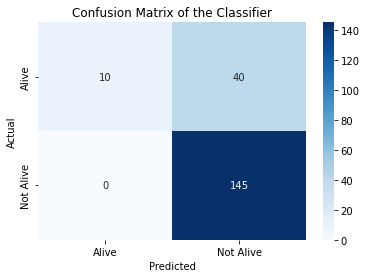

In [641]:
# calling the visual_cm function to plot the confusion matrix
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [642]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6


In [643]:
# zipping each feature name to its coefficient
logreg_model_values = zip(df[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one using for loop
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results using for loop
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.69)
('book4_A_Feast_For_Crows', 1.4)
('popularity', -0.52)
('numDeadRelations', -0.0)
('isNoble', -0.18)
('book1_A_Game_Of_Thrones', -0.18)
('dateOfBirth', -0.0)


# Modelling CART models

In [644]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [645]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8789
Full Tree Testing ACCURACY : 0.8308
Full Tree AUC Score: 0.7486


In [646]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one using print()
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}

""")



True Negatives : 29
False Positives: 21
False Negatives: 12
True Positives : 133




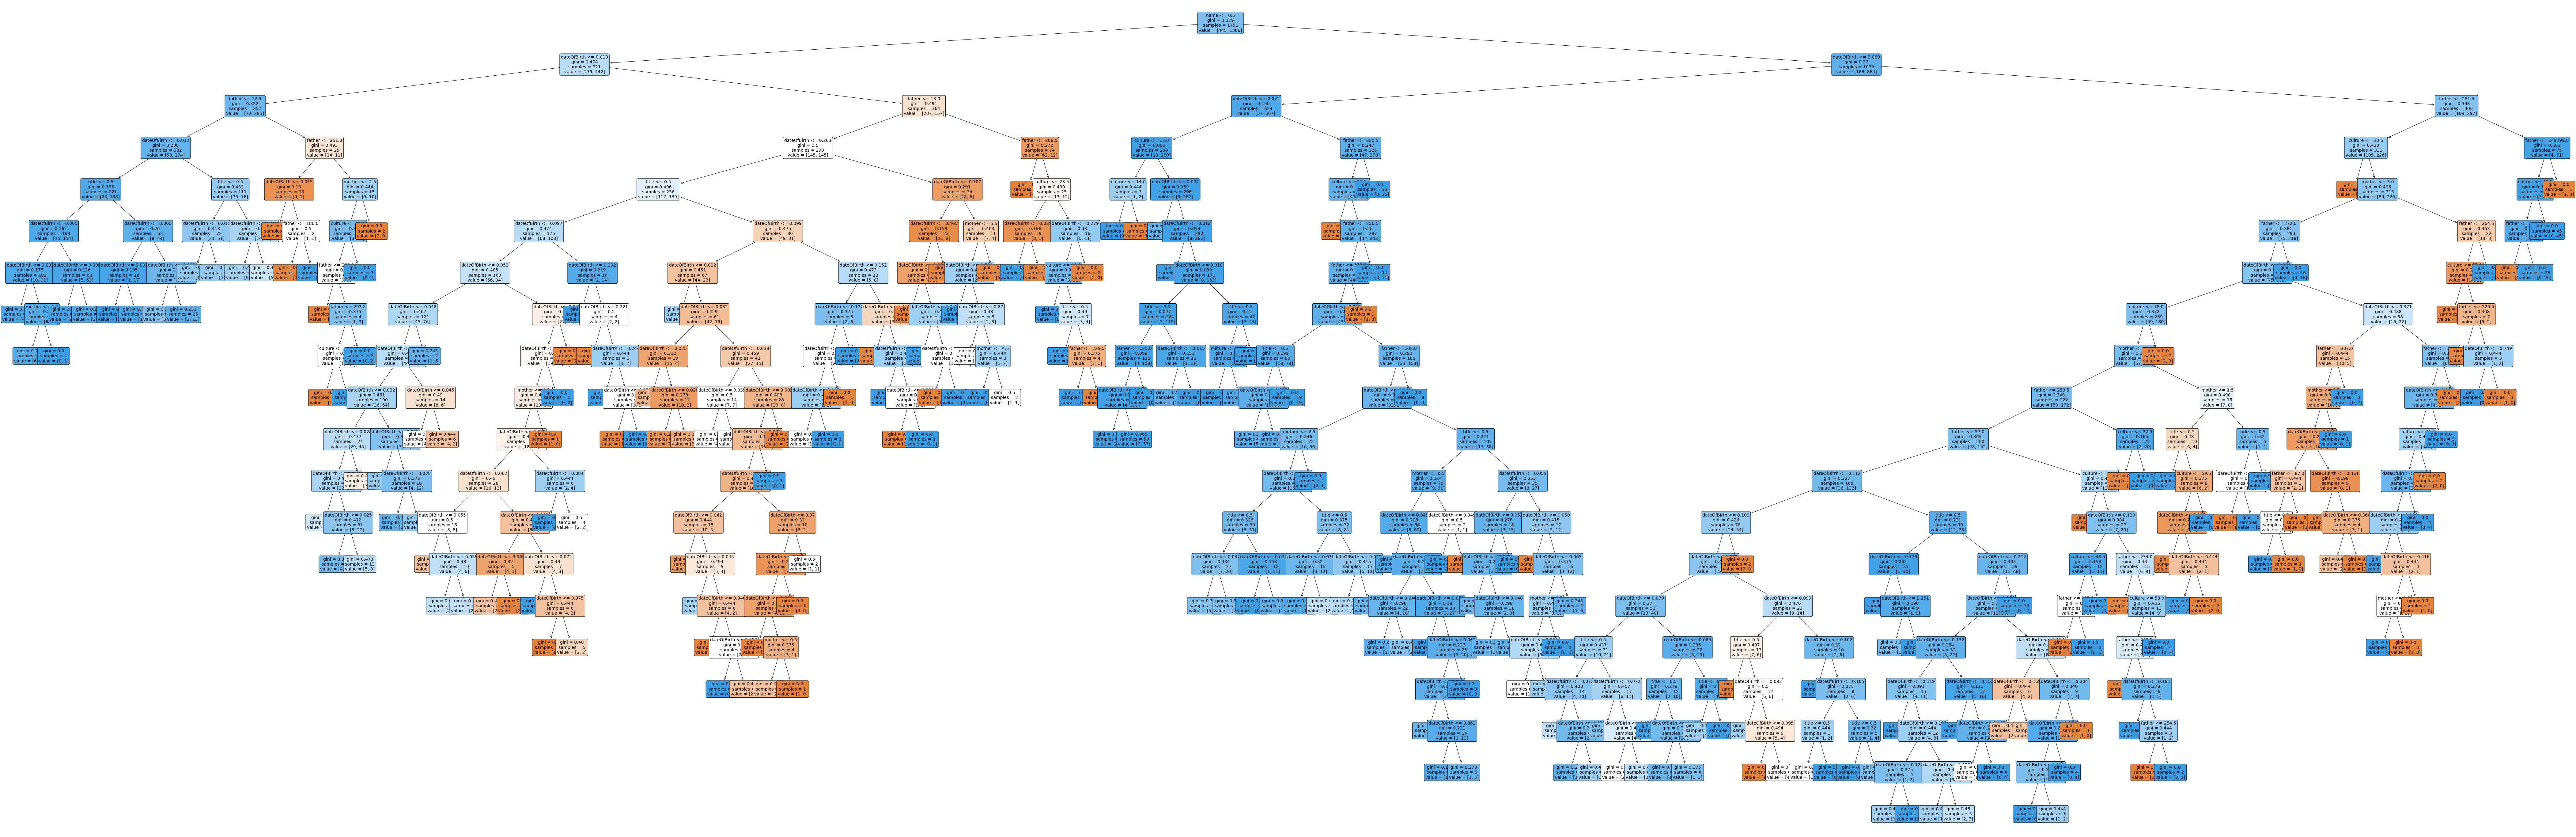

In [647]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = df.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot using the plt.show()
plt.show()

In [648]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8064
Testing  ACCURACY: 0.8513
AUC Score        : 0.7624


In [649]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one using print()
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 8
True Positives : 137



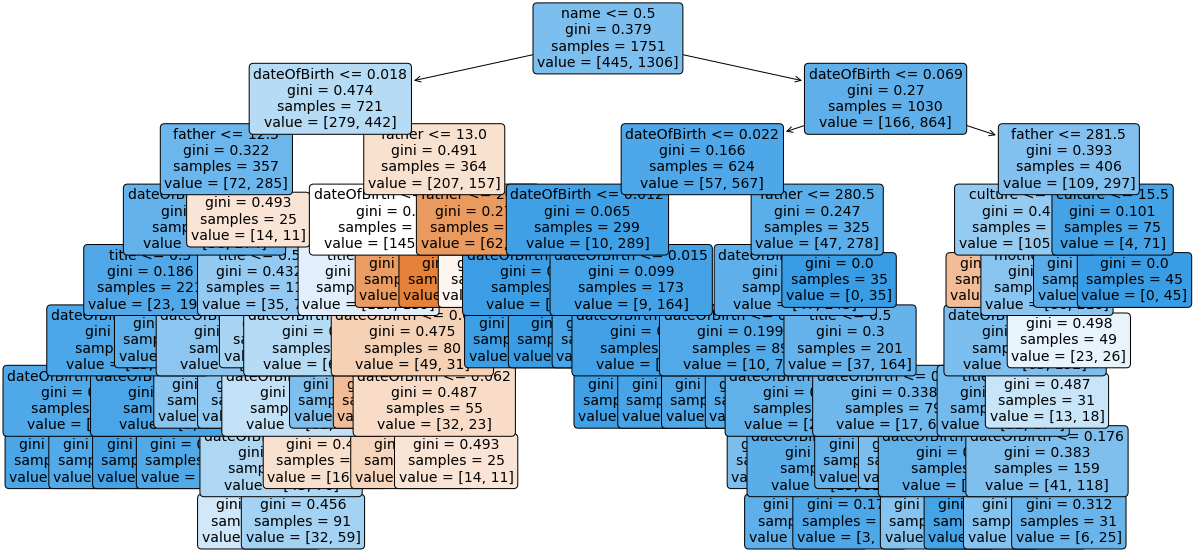

In [650]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = df.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

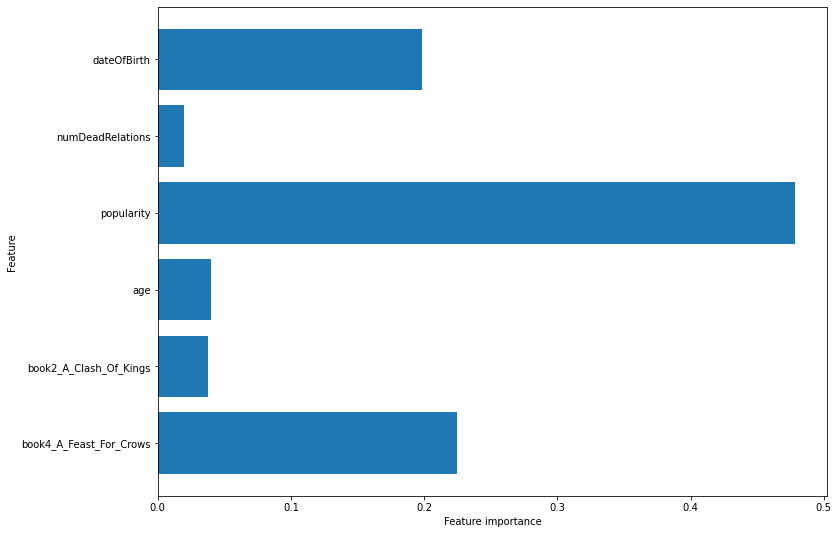

In [651]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [652]:
# comparing results of three plotted models
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('/Users/venugopalmuraleedharan/Downloads/Machine Learning/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6         (10, 40, 0, 145)
Full Tree     0.7486           (29, 21, 12, 133)
Pruned Tree   0.7624         (29, 21, 8, 137)



CLASSIFICATION BASED ON KNN 

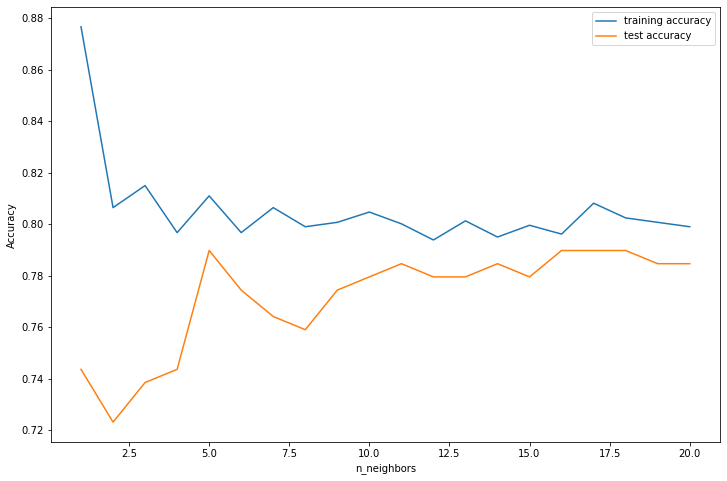

The optimal number of neighbors is: 5


In [653]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = df_data,
                                  y_data        = df_target,
                                  response_type = 'class')

In [654]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(df_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(df_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            df_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = df_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8115
Testing  ACCURACY: 0.8
AUC Score        : 0.6952


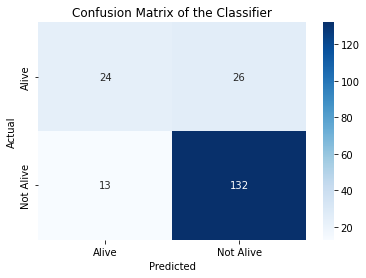

In [655]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Alive', 'Not Alive'])

In [656]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 8
True Positives : 137



In [657]:
# declaring model performance objects for knn
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                           'Training Accuracy' : knn_train_score,
                           'Testing Accuracy'  : knn_test_score,
                           'AUC Score'         : knn_auc_score,
                           'Confusion Matrix'  : (knn_tree_tn,
                                                  knn_tree_fp,
                                                  knn_tree_fn,
                                                  knn_tree_tp)},
                           ignore_index = True)


model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('/Users/venugopalmuraleedharan/Downloads/Machine Learning/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)

In [658]:


# loading model performance
model_performance = pd.read_excel('/Users/venugopalmuraleedharan/Downloads/Machine Learning/path_practice/__results/classification_model_performance_new.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones','isNoble', 'gender_guesser_male', 'age', 'popularity',
                   'numDeadRelations', 'isAliveFather', 'gender_guesser_female',
                   'gender_guesser_unknown'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations', 'gender_guesser_male'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones', 'gender_guesser_male']
    
}


########################################
# checking previous model performances
########################################
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"


# Performing Logistic Regression with Hyperparameters

In [659]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [660]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7607
Testing  ACCURACY: 0.7949
AUC Score        : 0.6


/Users/venugopalmuraleedharan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hyperparameter Tuning with RandomizedSearchCV

In [661]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer  
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm# customizable scorer

In [662]:
# ########################################
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# #C_range          = np.arange(0.1, 5.0, 0.1)
# #warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_range,
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(df_data, df_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [663]:
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.10296941, 0.05738147, 0.04450011, 0.03945422, 0.10048278,
        0.04541373, 0.10025962, 0.03670367, 0.10217206, 0.09927734,
        0.03657007, 0.04455876, 0.03558985, 0.09979558, 0.04703919,
        0.10038805, 0.05081638, 0.05153871, 0.10000626, 0.04836233,
        0.04104757, 0.02770702, 0.04612255, 0.10008709, 0.05105337,
        0.10101763, 0.09916202, 0.02279345, 0.10001437, 0.05388896,
        0.10028553, 0.02959895, 0.05050023, 0.04362297, 0.04663992,
        0.03780293, 0.04908419, 0.04694915, 0.099811  , 0.03495622,
        0.04129299, 0.02789815, 0.09093197, 0.09860261, 0.04947217,
        0.0435485 , 0.04444536, 0.0243868 , 0.10024969, 0.0363702 ,
        0.03528206, 0.10035205, 0.0981253 , 0.09809693, 0.04628332,
        0.09998767, 0.05565453, 0.10015265, 0.04617103, 0.05013863,
        0.04826403, 0.09978239, 0.09819531, 0.04189324, 0.10012142,
        0.04101849, 0.03291678, 0.10009996, 0.0304033 , 0.02730028,
        0.0321273 , 0.04651594,

In [664]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.7, max_iter=1000, random_state=219)

In [665]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.7,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(df_data, df_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7601
LR Tuned Testing  ACCURACY: 0.7897
LR Tuned AUC Score        : 0.6031


In [666]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 11
False Positives: 39
False Negatives: 2
True Positives : 143



In [667]:
# loading model performance
model_performance = pd.read_excel('/Users/venugopalmuraleedharan/Downloads/Machine Learning/path_practice/__results/classification_model_performance_new.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"


# Hyperparameter Tuning on Classification Trees

In [668]:
# # declaring a hyperparameter space
# criterion_range = ['gini', 'entropy']
# splitter_range  = ['best', 'random']
# depth_range     = np.arange(1, 25, 1)
# leaf_range      = np.arange(1, 100, 1)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_range,
#               'splitter'         : splitter_range,
#               'max_depth'        : depth_range,
#               'min_samples_leaf' : leaf_range}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 219)


# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                    param_distributions   = param_grid,
#                                    cv                    = 3,
#                                    n_iter                = 1000,
#                                    random_state          = 219,
#                                    scoring = make_scorer(roc_auc_score,
#                                              needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(df_data, df_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

# Build a classification tree model based on the hyperparameter tuning results.

In [669]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 3,
                                    max_depth        = 8,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8064
Testing  ACCURACY: 0.8667
AUC Score        : 0.7728


In [670]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 5
True Positives : 140



In [671]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"
5,Tuned Tree,0.7728,0.8064,0.8667,"(29, 21, 5, 140)"


# Building Randon Forest Models

In [672]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 350,
                                    criterion        = 'entropy',
                                    min_samples_leaf = 8,
                                    warm_start       = False,
                                    random_state     = 219)

In [673]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8235
Testing  ACCURACY: 0.8462
AUC Score        : 0.7328


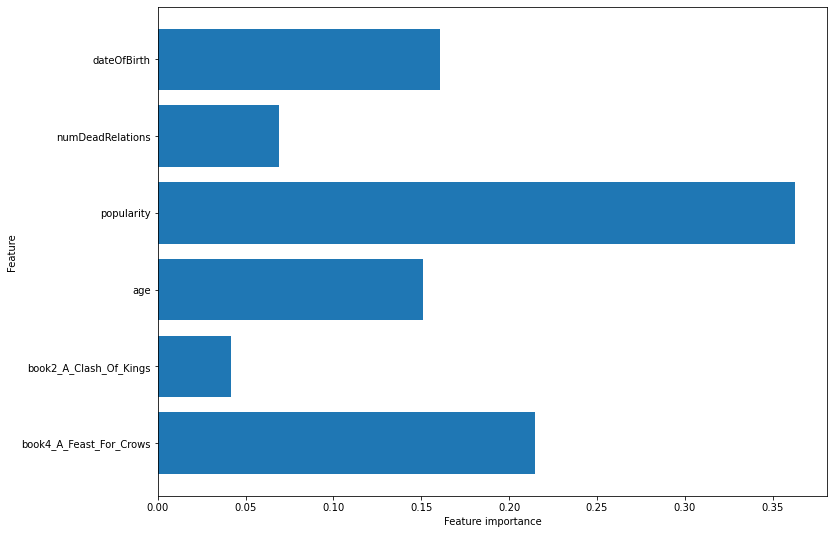

In [674]:
plot_feature_importances(rf_default_fit,x_train,export= False)

In [675]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 5
True Positives : 140



In [676]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"
5,Tuned Tree,0.7728,0.8064,0.8667,"(29, 21, 5, 140)"
6,Random Forest (Full),0.7328,0.8235,0.8462,"(25, 25, 5, 140)"


# Random Forest Tuning

In [677]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(df_data, df_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [678]:
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=219,
                       warm_start=True)

In [679]:
# INSTANTIATING a random forest model with default values




forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# # saving AUC score
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = rf_default_fit_pred).round(4))

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8772
Forest Tuned Testing  ACCURACY: 0.9179
Forest Tuned AUC Score        : 0.8662


In [680]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 4
True Positives : 141



In [681]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Tuned)',
                           'Training Accuracy'  : forest_tuned_train_score,
                           'Testing Accuracy'   : forest_tuned_test_score,
                           'AUC Score'          : forest_tuned_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"
5,Tuned Tree,0.7728,0.8064,0.8667,"(29, 21, 5, 140)"
6,Random Forest (Full),0.7328,0.8235,0.8462,"(25, 25, 5, 140)"
7,Random Forest (Tuned),0.8662,0.8772,0.9179,"(38, 12, 4, 141)"


In [682]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [683]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8458
Testing ACCURACY : 0.8564
AUC Score        : 0.7593


In [684]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 6
True Positives : 139



In [685]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"
5,Tuned Tree,0.7728,0.8064,0.8667,"(29, 21, 5, 140)"
6,Random Forest (Full),0.7328,0.8235,0.8462,"(25, 25, 5, 140)"
7,Random Forest (Tuned),0.8662,0.8772,0.9179,"(38, 12, 4, 141)"
8,GBM (Full),0.7593,0.8458,0.8564,"(28, 22, 6, 139)"


In [686]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(2, 11, 2)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(df_data, df_target)



# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [687]:
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.6, max_depth=2, random_state=219,
                           warm_start=True)

In [688]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 2,
                                       n_estimators  = 100,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8624
Testing  ACCURACY: 0.9179
AUC Score        : 0.8662


In [689]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 4
True Positives : 141



In [690]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6000,0.7607,0.7949,"(10, 40, 0, 145)"
1,Full Tree,0.7486,0.8789,0.8308,"(29, 21, 12, 133)"
2,Pruned Tree,0.7624,0.8064,0.8513,"(29, 21, 8, 137)"
3,KNN,0.6952,0.8115,0.8000,"(24, 26, 13, 132)"
4,Tuned LR,0.6031,0.7601,0.7897,"(11, 39, 2, 143)"
5,Tuned Tree,0.7728,0.8064,0.8667,"(29, 21, 5, 140)"
6,Random Forest (Full),0.7328,0.8235,0.8462,"(25, 25, 5, 140)"
7,Random Forest (Tuned),0.8662,0.8772,0.9179,"(38, 12, 4, 141)"
8,GBM (Full),0.7593,0.8458,0.8564,"(28, 22, 6, 139)"
9,Tuned GBM,0.8662,0.8624,0.9179,"(38, 12, 4, 141)"


In [691]:
print(f"""
Model                 Train Accu  Test Accu  AUC score    TP     TN    FP  FN
-----                 ----------  ---------  ----------   --     --    --  --
RANDOM Forest Tuned   {forest_tuned_train_score}      {forest_tuned_test_score}     {forest_tuned_auc}        {tuned_rf_tp}    {tuned_rf_tn}    {tuned_rf_fp}   {tuned_rf_fn}
 this is the selected model
""")


Model                 Train Accu  Test Accu  AUC score    TP     TN    FP  FN
-----                 ----------  ---------  ----------   --     --    --  --
RANDOM Forest Tuned   0.8772      0.9179     0.8662        141    38    12   4
 this is the selected model

